In [18]:
# Import important libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.api import Logit
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
# Import Data
data = pd.read_csv("Meteo/meteo.csv") 

In [9]:
# Check if there is Null values 
data.isnull().values.any()

False

In [4]:
# information about the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   time                                8784 non-null   object 
 1   temperature_2m (°C)                 8784 non-null   float64
 2   relativehumidity_2m (%)             8784 non-null   int64  
 3   dewpoint_2m (°C)                    8784 non-null   float64
 4   apparent_temperature (°C)           8784 non-null   float64
 5   pressure_msl (hPa)                  8784 non-null   float64
 6   surface_pressure (hPa)              8784 non-null   float64
 7   precipitation (mm)                  8784 non-null   float64
 8   rain (mm)                           8784 non-null   float64
 9   snowfall (cm)                       8784 non-null   float64
 10  weathercode (wmo code)              8784 non-null   int64  
 11  cloudcover (%)                      8784 no

In [5]:
# Generate a "Target" column based on precipitation 
data["Target"] = 0 # Generate new column 
data.loc[data['precipitation (mm)'] > 0, 'Target'] = 1 # Generate a target column

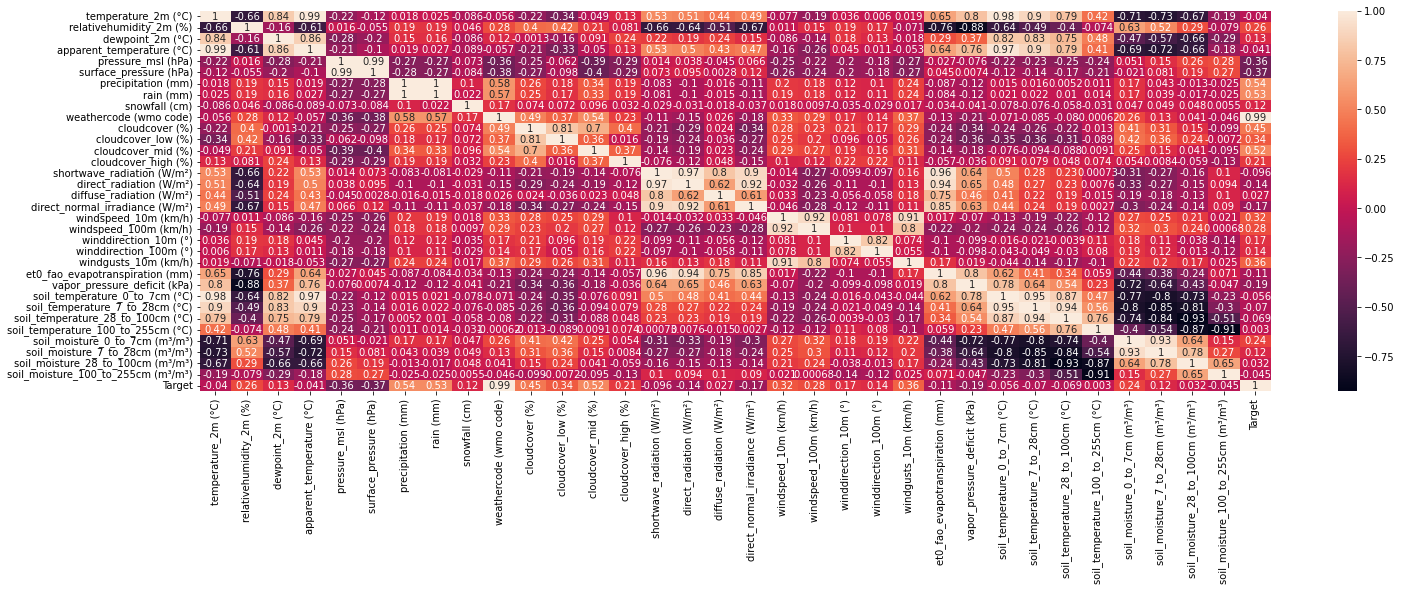

In [6]:
# There are many columns in the data, we check the correlations
plt.figure(figsize=(24,7))
cor = data.corr()
sns.heatmap(cor, annot=True)
plt.show()


In [ ]:
# To avoid a problem called (PerfectSeparationError: Perfect separation detected, results not available)
# I search for the values where the correlation is high between target and the column

In [7]:
# Drop the columns where there is a high correlation (to avoid PerfectSeparationError)
data.drop(columns = ["apparent_temperature (°C)",
                   "soil_temperature_0_to_7cm (°C)",
                   "soil_moisture_7_to_28cm (m³/m³)",
                   "weathercode (wmo code)",
                   "surface_pressure (hPa)",
                   "direct_radiation (W/m²)",
                   "diffuse_radiation (W/m²)",
                   "direct_normal_irradiance (W/m²)",
                   "et0_fao_evapotranspiration (mm)",
                   "soil_moisture_7_to_28cm (m³/m³)",
                   "soil_moisture_28_to_100cm (m³/m³)",
                   "soil_moisture_100_to_255cm (m³/m³)",
                   "vapor_pressure_deficit (kPa)",
                   "dewpoint_2m (°C)",
                   "windgusts_10m (km/h)",
                   "windspeed_100m (km/h)",
                   "soil_temperature_7_to_28cm (°C)"], inplace=True)

In [ ]:
data.head()

,time,temperature_2m (°C),relativehumidity_2m (%),pressure_msl (hPa),precipitation (mm),rain (mm),snowfall (cm),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),shortwave_radiation (W/m²),windspeed_10m (km/h),winddirection_10m (°),winddirection_100m (°),soil_temperature_28_to_100cm (°C),soil_temperature_100_to_255cm (°C),soil_moisture_0_to_7cm (m³/m³),Target
0,2022-01-01T00:00,8.6,95,1028.0,0.0,0.0,0.0,97,98,0,30,0.0,8.9,43,32,7.4,9.3,0.400,0
1,2022-01-01T01:00,8.8,95,1028.1,0.0,0.0,0.0,96,96,0,32,0.0,10.9,44,35,7.4,9.2,0.400,0
2,2022-01-01T02:00,8.8,95,1028.0,0.0,0.0,0.0,82,88,0,9,0.0,10.9,34,27,7.4,9.2,0.400,0
3,2022-01-01T03:00,8.5,96,1027.7,0.0,0.0,0.0,59,64,0,4,0.0,9.7,31,22,7.4,9.2,0.400,0
4,2022-01-01T04:00,8.3,96,1027.6,0.0,0.0,0.0,33,37,0,0,0.0,9.0,37,24,7.4,9.2,0.399,0


In [12]:
# The target column represent the precipitation as true-false
# And it can be used to represent both snowfall and rain
X = data[data.columns.drop(["time","precipitation (mm)", "rain (mm)","snowfall (cm)","Target"])]
X = X/X.max() # normalize the data
X = sm.add_constant(X)
Y = data["Target"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

In [13]:
modele = Logit(endog = Y, exog = X)

In [16]:
modele = Logit(endog = y_train, exog = X_train) # Ordinary Least Square
results = modele.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.291768
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Target   No. Observations:                 6148
Model:                          Logit   Df Residuals:                     6133
Method:                           MLE   Df Model:                           14
Date:                Fri, 24 Mar 2023   Pseudo R-squ.:                  0.4117
Time:                        21:41:25   Log-Likelihood:                -1793.8
converged:                       True   LL-Null:                       -3049.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 69.6851      6.441     10.819      0.000      57.061      82.309
temperature_2m (°C)                    3.6298      0.533      6.810      0.000       2.585       4.675
relativehumidity_2m (%)                8.9539      0.562     15.933      0.000       7.852      10.055
pressure_msl (hPa)                   -84.5673      6.514    -12.983      0.000     -97.334     -71.801
cloudcover (%)                         1.4193      0.342      4.147      0.000       0.748       2.090
cloudcover_low (%)                    -0.0460      0.221     -0.208      0.835      -0.478       0.386
cloudcover_mid (%)                     2.0960      0.184     11.400      0.000       1.736       2.456
cloudcover_high (%)                   -0.4020      0.133     -3.030      0.002      -0.662      -0.142
shortwave_radiation (W/m²)             2.5039      0.319      7.852      0.000       1.879       3.129
windspeed_10m (km/h)                   4.0362      0.402     10.038      0.000       3.248       4.824
winddirection_10m (°)                  0.5833      0.346      1.684      0.092      -0.096       1.262
winddirection_100m (°)                -0.3525      0.348     -1.014      0.311      -1.034       0.329
soil_temperature_28_to_100cm (°C)      0.4115      0.490      0.839      0.401      -0.549       1.372
soil_temperature_100_to_255cm (°C)    -1.1236      0.316     -3.551      0.000      -1.744      -0.503
soil_moisture_0_to_7cm (m³/m³)         0.7887      0.459      1.717      0.086      -0.112       1.689
======================================================================================================
"""

In [19]:
y_predicted = results.predict(X_test)
prevision_groups = np.where(y_predicted>0.5,1,0)
metrics.confusion_matrix(prevision_groups,y_test)

array([[1992,  240],
       [  96,  308]])

In [22]:
accuracy = 1-(240+96)/len(y_test)
print(accuracy)

0.8725341426403642


In [20]:
# The column "cloudcover_low (%)" has a high p-value
# If we try to remove it and repeat the process

In [33]:
# The target column represent the precipitation as true-false
# And it can be used to represent both snowfall and rain
X = data[data.columns.drop(["time","precipitation (mm)", "rain (mm)","snowfall (cm)","cloudcover_low (%)","Target"])]
X = X/X.max() # normalize the data
X = sm.add_constant(X)
Y = data["Target"]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
modele = Logit(endog = y_train, exog = X_train) # Ordinary Least Square
results = modele.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.292260
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Target   No. Observations:                 6148
Model:                          Logit   Df Residuals:                     6134
Method:                           MLE   Df Model:                           13
Date:                Fri, 24 Mar 2023   Pseudo R-squ.:                  0.4189
Time:                        21:56:04   Log-Likelihood:                -1796.8
converged:                       True   LL-Null:                       -3092.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 57.7065      6.338      9.105      0.000      45.284      70.128
temperature_2m (°C)                    3.3862      0.535      6.330      0.000       2.338       4.435
relativehumidity_2m (%)                8.9886      0.551     16.319      0.000       7.909      10.068
pressure_msl (hPa)                   -72.5113      6.406    -11.319      0.000     -85.067     -59.955
cloudcover (%)                         1.5486      0.197      7.857      0.000       1.162       1.935
cloudcover_mid (%)                     2.3235      0.161     14.466      0.000       2.009       2.638
cloudcover_high (%)                   -0.4251      0.121     -3.525      0.000      -0.661      -0.189
shortwave_radiation (W/m²)             2.6778      0.318      8.424      0.000       2.055       3.301
windspeed_10m (km/h)                   3.9859      0.395     10.100      0.000       3.212       4.759
winddirection_10m (°)                  0.7412      0.368      2.015      0.044       0.020       1.462
winddirection_100m (°)                -0.3089      0.369     -0.837      0.403      -1.032       0.415
soil_temperature_28_to_100cm (°C)      0.4675      0.494      0.946      0.344      -0.501       1.436
soil_temperature_100_to_255cm (°C)    -1.0678      0.316     -3.374      0.001      -1.688      -0.448
soil_moisture_0_to_7cm (m³/m³)         0.6971      0.459      1.519      0.129      -0.202       1.596
======================================================================================================
"""

In [35]:
y_predicted = results.predict(X_test)
prevision_groups = np.where(y_predicted>0.5,1,0)
metrics.confusion_matrix(prevision_groups,y_test)


array([[1995,  218],
       [ 124,  299]])

In [36]:
accuracy = 1-(124+218)/len(y_test)
print(accuracy)

0.870257966616085


In [27]:
# Reducing the features while having the same accuarcy is better so we
# keep "cloudcover_low (%)" out of our data
# We repeat the process by taking out "soil_temperature_28_to_100cm (°C)"

In [37]:
# The target column represent the precipitation as true-false
# And it can be used to represent both snowfall and rain
X = data[data.columns.drop(["time","precipitation (mm)", "rain (mm)","snowfall (cm)","cloudcover_low (%)",
                            "soil_temperature_28_to_100cm (°C)","Target"])]
X = X/X.max() # normalize the data
X = sm.add_constant(X)
Y = data["Target"]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
modele = Logit(endog = y_train, exog = X_train) # Ordinary Least Square
results = modele.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.294007
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Target   No. Observations:                 6148
Model:                          Logit   Df Residuals:                     6135
Method:                           MLE   Df Model:                           12
Date:                Fri, 24 Mar 2023   Pseudo R-squ.:                  0.4157
Time:                        21:58:27   Log-Likelihood:                -1807.6
converged:                       True   LL-Null:                       -3093.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 68.8088      6.220     11.063      0.000      56.618      81.000
temperature_2m (°C)                    4.0461      0.409      9.897      0.000       3.245       4.847
relativehumidity_2m (%)                9.2754      0.557     16.644      0.000       8.183      10.368
pressure_msl (hPa)                   -84.0274      6.330    -13.275      0.000     -96.433     -71.621
cloudcover (%)                         1.3712      0.194      7.067      0.000       0.991       1.751
cloudcover_mid (%)                     2.2022      0.160     13.803      0.000       1.890       2.515
cloudcover_high (%)                   -0.3658      0.118     -3.111      0.002      -0.596      -0.135
shortwave_radiation (W/m²)             2.5170      0.316      7.965      0.000       1.898       3.136
windspeed_10m (km/h)                   3.9229      0.386     10.159      0.000       3.166       4.680
winddirection_10m (°)                  0.6235      0.345      1.807      0.071      -0.053       1.300
winddirection_100m (°)                -0.4204      0.348     -1.208      0.227      -1.102       0.261
soil_temperature_100_to_255cm (°C)    -0.8464      0.209     -4.051      0.000      -1.256      -0.437
soil_moisture_0_to_7cm (m³/m³)         0.8021      0.431      1.860      0.063      -0.043       1.647
======================================================================================================
"""

In [39]:
y_predicted = results.predict(X_test)
prevision_groups = np.where(y_predicted>0.5,1,0)
metrics.confusion_matrix(prevision_groups,y_test)

array([[2005,  214],
       [ 115,  302]])

In [40]:
accuracy = 1-(115+214)/len(y_test)
print(accuracy)

0.8751896813353566


In [41]:
# Reducing the features while having the same accuarcy is better so we
# keep "soil_temperature_28_to_100cm (°C)" out of our data
# We repeat the process by taking out "winddirection_10m (°)"

In [42]:
# The target column represent the precipitation as true-false
# And it can be used to represent both snowfall and rain
X = data[data.columns.drop(["time","precipitation (mm)", "rain (mm)","snowfall (cm)","cloudcover_low (%)",
                            "soil_temperature_28_to_100cm (°C)","winddirection_10m (°)","Target"])]
X = X/X.max() # normalize the data
X = sm.add_constant(X)
Y = data["Target"]

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
modele = Logit(endog = y_train, exog = X_train) # Ordinary Least Square
results = modele.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.289091
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Target   No. Observations:                 6148
Model:                          Logit   Df Residuals:                     6136
Method:                           MLE   Df Model:                           11
Date:                Fri, 24 Mar 2023   Pseudo R-squ.:                  0.4190
Time:                        22:01:38   Log-Likelihood:                -1777.3
converged:                       True   LL-Null:                       -3058.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 62.7154      6.195     10.123      0.000      50.572      74.858
temperature_2m (°C)                    3.8094      0.415      9.182      0.000       2.996       4.623
relativehumidity_2m (%)                9.3208      0.557     16.723      0.000       8.228      10.413
pressure_msl (hPa)                   -77.7913      6.288    -12.371      0.000     -90.116     -65.467
cloudcover (%)                         1.5131      0.196      7.713      0.000       1.129       1.898
cloudcover_mid (%)                     2.2272      0.160     13.943      0.000       1.914       2.540
cloudcover_high (%)                   -0.4052      0.119     -3.399      0.001      -0.639      -0.172
shortwave_radiation (W/m²)             2.7133      0.320      8.468      0.000       2.085       3.341
windspeed_10m (km/h)                   3.7716      0.387      9.746      0.000       3.013       4.530
winddirection_100m (°)                 0.1571      0.202      0.779      0.436      -0.238       0.552
soil_temperature_100_to_255cm (°C)    -0.8679      0.209     -4.146      0.000      -1.278      -0.458
soil_moisture_0_to_7cm (m³/m³)         0.7963      0.444      1.794      0.073      -0.074       1.666
======================================================================================================
"""

In [44]:
y_predicted = results.predict(X_test)
prevision_groups = np.where(y_predicted>0.5,1,0)
metrics.confusion_matrix(prevision_groups,y_test)

array([[1981,  242],
       [ 114,  299]])

In [45]:
accuracy = 1-(114+242)/len(y_test)
print(accuracy)

0.8649468892261002


In [46]:
# Reducing the features while having the same accuarcy is better so we
# keep "winddirection_10m (°)" out of our data
# We repeat the process by taking out "winddirection_100m (°)"

In [47]:
# The target column represent the precipitation as true-false
# And it can be used to represent both snowfall and rain
X = data[data.columns.drop(["time","precipitation (mm)", "rain (mm)","snowfall (cm)","cloudcover_low (%)",
                            "soil_temperature_28_to_100cm (°C)","winddirection_10m (°)",
                            "winddirection_100m (°)","Target"])]
X = X/X.max() # normalize the data
X = sm.add_constant(X)
Y = data["Target"]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
modele = Logit(endog = y_train, exog = X_train) # Ordinary Least Square
results = modele.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.287840
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Target   No. Observations:                 6148
Model:                          Logit   Df Residuals:                     6137
Method:                           MLE   Df Model:                           10
Date:                Fri, 24 Mar 2023   Pseudo R-squ.:                  0.4225
Time:                        22:04:29   Log-Likelihood:                -1769.6
converged:                       True   LL-Null:                       -3064.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 64.6443      6.292     10.273      0.000      52.311      76.977
temperature_2m (°C)                    4.3512      0.409     10.644      0.000       3.550       5.152
relativehumidity_2m (%)                9.8470      0.566     17.413      0.000       8.739      10.955
pressure_msl (hPa)                   -80.2425      6.392    -12.554      0.000     -92.770     -67.715
cloudcover (%)                         1.3471      0.195      6.891      0.000       0.964       1.730
cloudcover_mid (%)                     2.2693      0.162     13.974      0.000       1.951       2.588
cloudcover_high (%)                   -0.3286      0.119     -2.770      0.006      -0.561      -0.096
shortwave_radiation (W/m²)             2.4164      0.325      7.437      0.000       1.780       3.053
windspeed_10m (km/h)                   4.3695      0.397     11.012      0.000       3.592       5.147
soil_temperature_100_to_255cm (°C)    -0.9120      0.209     -4.356      0.000      -1.322      -0.502
soil_moisture_0_to_7cm (m³/m³)         0.7389      0.431      1.716      0.086      -0.105       1.583
======================================================================================================
"""

In [49]:
y_predicted = results.predict(X_test)
prevision_groups = np.where(y_predicted>0.5,1,0)
metrics.confusion_matrix(prevision_groups,y_test)

array([[1959,  225],
       [ 140,  312]])

In [50]:
accuracy = 1-(140+225)/len(y_test)
print(accuracy)

0.8615326251896813


In [51]:
# Reducing the features while having the same accuarcy is better so we
# keep "winddirection_100m (°)" out of our data
# We repeat the process by taking out "soil_moisture_0_to_7cm (m³/m³)"

In [52]:
# The target column represent the precipitation as true-false
# And it can be used to represent both snowfall and rain
X = data[data.columns.drop(["time","precipitation (mm)", "rain (mm)","snowfall (cm)","cloudcover_low (%)",
                            "soil_temperature_28_to_100cm (°C)","winddirection_10m (°)",
                            "soil_moisture_0_to_7cm (m³/m³)",
                            "winddirection_100m (°)","Target"])]
X = X/X.max() # normalize the data
X = sm.add_constant(X)
Y = data["Target"]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
modele = Logit(endog = Y, exog = X)
modele = Logit(endog = y_train, exog = X_train) # Ordinary Least Square
results = modele.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.290169
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Target   No. Observations:                 6148
Model:                          Logit   Df Residuals:                     6138
Method:                           MLE   Df Model:                            9
Date:                Fri, 24 Mar 2023   Pseudo R-squ.:                  0.4221
Time:                        22:07:40   Log-Likelihood:                -1784.0
converged:                       True   LL-Null:                       -3086.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 62.0694      6.286      9.874      0.000      49.749      74.390
temperature_2m (°C)                    3.7405      0.359     10.432      0.000       3.038       4.443
relativehumidity_2m (%)                9.7061      0.529     18.332      0.000       8.668      10.744
pressure_msl (hPa)                   -76.7877      6.391    -12.014      0.000     -89.314     -64.261
cloudcover (%)                         1.2397      0.199      6.223      0.000       0.849       1.630
cloudcover_mid (%)                     2.3644      0.163     14.467      0.000       2.044       2.685
cloudcover_high (%)                   -0.1651      0.117     -1.408      0.159      -0.395       0.065
shortwave_radiation (W/m²)             2.7577      0.308      8.962      0.000       2.155       3.361
windspeed_10m (km/h)                   4.3175      0.365     11.813      0.000       3.601       5.034
soil_temperature_100_to_255cm (°C)    -0.8946      0.208     -4.295      0.000      -1.303      -0.486
======================================================================================================
"""

In [54]:
y_predicted = results.predict(X_test)
prevision_groups = np.where(y_predicted>0.5,1,0)
metrics.confusion_matrix(prevision_groups,y_test)

array([[2006,  236],
       [ 109,  285]])

In [55]:
accuracy = 1-(109+236)/len(y_test)
print(accuracy)

0.8691198786039454


In [56]:
# Reducing the features while having the same accuarcy is better so we
# keep "soil_moisture_0_to_7cm (m³/m³)" out of our data
# We repeat the process by taking out "cloudcover_high (%)"

In [57]:
# The target column represent the precipitation as true-false
# And it can be used to represent both snowfall and rain
X = data[data.columns.drop(["time","precipitation (mm)", "rain (mm)","snowfall (cm)","cloudcover_low (%)",
                            "soil_temperature_28_to_100cm (°C)","winddirection_10m (°)",
                            "soil_moisture_0_to_7cm (m³/m³)",
                            "cloudcover_high (%)",
                            "winddirection_100m (°)","Target"])]
X = X/X.max() # normalize the data
X = sm.add_constant(X)
Y = data["Target"]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
modele = Logit(endog = y_train, exog = X_train) # Ordinary Least Square
results = modele.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.297513
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Target   No. Observations:                 6148
Model:                          Logit   Df Residuals:                     6139
Method:                           MLE   Df Model:                            8
Date:                Fri, 24 Mar 2023   Pseudo R-squ.:                  0.4045
Time:                        22:10:47   Log-Likelihood:                -1829.1
converged:                       True   LL-Null:                       -3071.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 59.9644      6.071      9.878      0.000      48.066      71.863
temperature_2m (°C)                    3.5249      0.338     10.443      0.000       2.863       4.186
relativehumidity_2m (%)                9.4917      0.516     18.392      0.000       8.480      10.503
pressure_msl (hPa)                   -74.2944      6.178    -12.025      0.000     -86.403     -62.186
cloudcover (%)                         1.4012      0.189      7.409      0.000       1.031       1.772
cloudcover_mid (%)                     2.0991      0.156     13.450      0.000       1.793       2.405
shortwave_radiation (W/m²)             2.7047      0.297      9.095      0.000       2.122       3.288
windspeed_10m (km/h)                   3.9826      0.363     10.968      0.000       3.271       4.694
soil_temperature_100_to_255cm (°C)    -0.9651      0.205     -4.698      0.000      -1.368      -0.562
======================================================================================================
"""

In [59]:
y_predicted = results.predict(X_test)
prevision_groups = np.where(y_predicted>0.5,1,0)
metrics.confusion_matrix(prevision_groups,y_test)

array([[1992,  213],
       [ 112,  319]])

In [60]:
accuracy = 1-(112+213)/len(y_test)
print(accuracy)

0.8767071320182094


In [63]:
# According to the p-values, we cannot remove any other columns
# So we consider the last model which gave 0.87 accuarcy on one split
# but to ensure its accuarcy we do 3 times split

In [64]:
k = 3
count = 0
for i in range(k):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)
    modele = Logit(endog = y_train, exog = X_train) # Ordinary Least Square
    results = modele.fit(disp=False)
    y_predicted = results.predict(X_test)
    errors = sum(y_test == np.where(y_predicted>0.5,1,0))
    count += errors/len(y_predicted)
accuarcy = count/k
print(accuracy)

0.8767071320182094


In [65]:
# Generate the model for predicting the rain/snow
X = data[data.columns.drop(["time","precipitation (mm)", "rain (mm)","snowfall (cm)","cloudcover_low (%)",
                            "soil_temperature_28_to_100cm (°C)","winddirection_10m (°)",
                            "soil_moisture_0_to_7cm (m³/m³)",
                            "cloudcover_high (%)",
                            "winddirection_100m (°)","Target"])]
X = X/X.max() # normalize the data
X = sm.add_constant(X)
Y = data["Target"]

In [66]:
modele = Logit(endog = Y, exog = X)

In [67]:
out_result = modele.fit()

Optimization terminated successfully.
         Current function value: 0.292168
         Iterations 8


In [72]:
out_result.save("./Meteo/model")